In [10]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [11]:
def cargar_datos(archivo):

    # Cargar datos desde CSV
    df = pd.read_csv(archivo, index_col=0)
    return df


In [12]:
def variables_categoricas(df):
   
    # Identificar columnas categóricas con valores nulos
    nulos_categoricas = df[df.columns[df.isnull().any()]].select_dtypes(include="O").columns
    print("Las columnas categóricas que tienen nulos son : \n")
    print(nulos_categoricas)

    # Mostrar los valores de cada columna categórica con nulos
    for col in nulos_categoricas:
        print(f"La distribución de las categorías para la columna {col.upper()}")
        display(df[col].value_counts() / df.shape[0])
        print("........................")

    # Listas de columnas para reemplazar por la moda y por "Unknown"
    columnas_moda = ['OverTime', 'Department', 'PerformanceRating', 'WorkLifeBalance']
    columnas_desconocido = ['BusinessTravel', 'EmployeeNumber' , 'MaritalStatus']

    # Reemplazar nulos con la moda 
    for columna in columnas_moda:
        moda = df[columna].mode()[0]  
        df[columna] = df[columna].fillna(moda)  

    # Reemplazar nulos con "Unknown" 
    for columna in columnas_desconocido:
        df[columna] = df[columna].fillna("Unknown")

    # Verificar si se han eliminado los nulos
    print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
    print(df[columnas_moda + columnas_desconocido].isnull().sum())

    return df


In [13]:
def variables_numericas(df):
   
    # Identificar columnas numéricas con valores nulos
    nulos_numericas = df[df.columns[df.isnull().any()]].select_dtypes(include=np.number).columns
    print("Las columnas numéricas que tienen nulos son : \n")
    print(nulos_numericas)

    # Mostrar el porcentaje de valores nulos 
    print(df[nulos_numericas].isnull().sum() / df.shape[0] * 100)

    # Visualización de valores atípicos en columnas numéricas
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    axes = axes.flat
    for indice, col in enumerate(nulos_numericas):
        sns.boxplot(x=col, data=df, ax=axes[indice])
    plt.tight_layout()
    fig.delaxes(axes[-1])

    # Reemplazar nulos con la media 
    media = df[["DailyRate", "HourlyRate"]].mean()
    df[["DailyRate", "HourlyRate"]] = df[["DailyRate", "HourlyRate"]].fillna(media)

    # Verificar si se han eliminado los nulos 
    print(f"Después del 'fillna' tenemos {df[['DailyRate', 'HourlyRate']].isnull().sum()} nulos")

    # Copiar el DataFrame 
    df_copia = df.copy()

    # Configurar y aplicar IterativeImputer 
    imputer_iterative = IterativeImputer(max_iter=20, random_state=42)
    imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[[ "MonthlyIncome", "TotalWorkingYears"]])

    # Asignar los valores imputados de nuevo al DataFrame
    df_copia[["MonthlyIncome", "TotalWorkingYears"]] = imputer_iterative_imputado

    # Verificar si se han eliminado los nulos 
    print(f"Después del 'Iterative' tenemos: \n{df_copia[[ 'MonthlyIncome', 'TotalWorkingYears']].isnull().sum()} nulos")

    # Describir las estadísticas del DataFrame imputado
    print(df_copia.describe()[['MonthlyIncome','TotalWorkingYears']])

    # Guardar el DataFrame en un archivo CSV
    df_copia.to_csv("./data/hr_raw_data_nonulls.csv", index=False)

    return df_copia


Las columnas categóricas que tienen nulos son : 

Index(['BusinessTravel', 'Department', 'EmployeeNumber', 'MaritalStatus',
       'OverTime', 'PerformanceRating', 'WorkLifeBalance'],
      dtype='object')
La distribución de las categorías para la columna BUSINESSTRAVEL


BusinessTravel
Travel Rarely        0.363073
Travel Frequently    0.102230
Non Travel           0.056382
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DEPARTMENT


Department
Research & Development     0.121437
Sales                      0.056382
Human Resources            0.009294
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EMPLOYEENUMBER


EmployeeNumber
495,0    0.001239
501,0    0.001239
502,0    0.001239
507,0    0.001239
517,0    0.001239
           ...   
164,0    0.000620
190,0    0.000620
194,0    0.000620
226,0    0.000620
998,0    0.000620
Name: count, Length: 1079, dtype: float64

........................
La distribución de las categorías para la columna MARITALSTATUS


MaritalStatus
Married     0.271995
Single      0.201363
Divorced    0.123296
Name: count, dtype: float64

........................
La distribución de las categorías para la columna OVERTIME


OverTime
No     0.422553
Yes    0.158612
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PERFORMANCERATING


PerformanceRating
3,0    0.746592
4,0    0.132590
Name: count, dtype: float64

........................
La distribución de las categorías para la columna WORKLIFEBALANCE


WorkLifeBalance
3,0    0.565675
2,0    0.222429
4,0    0.096035
1,0    0.048947
Name: count, dtype: float64

........................
Después del reemplazo usando 'fillna' quedan los siguientes nulos
OverTime             0
Department           0
PerformanceRating    0
WorkLifeBalance      0
BusinessTravel       0
EmployeeNumber       0
MaritalStatus        0
dtype: int64
Las columnas numéricas que tienen nulos son : 

Index(['DailyRate', 'HourlyRate', 'MonthlyIncome', 'TotalWorkingYears'], dtype='object')
DailyRate             7.682776
HourlyRate            5.204461
MonthlyIncome        52.230483
TotalWorkingYears    32.589839
dtype: float64
Después del 'fillna' tenemos DailyRate     0
HourlyRate    0
dtype: int64 nulos
Después del 'Iterative' tenemos: 
MonthlyIncome        0
TotalWorkingYears    0
dtype: int64 nulos
       MonthlyIncome  TotalWorkingYears
count    1614.000000        1614.000000
mean     6399.663531          11.520610
std      3991.855967           7.119934
min       593.017428           0.000000
25%      3617.152177           7.000000
50%      5633.242011          10.000000


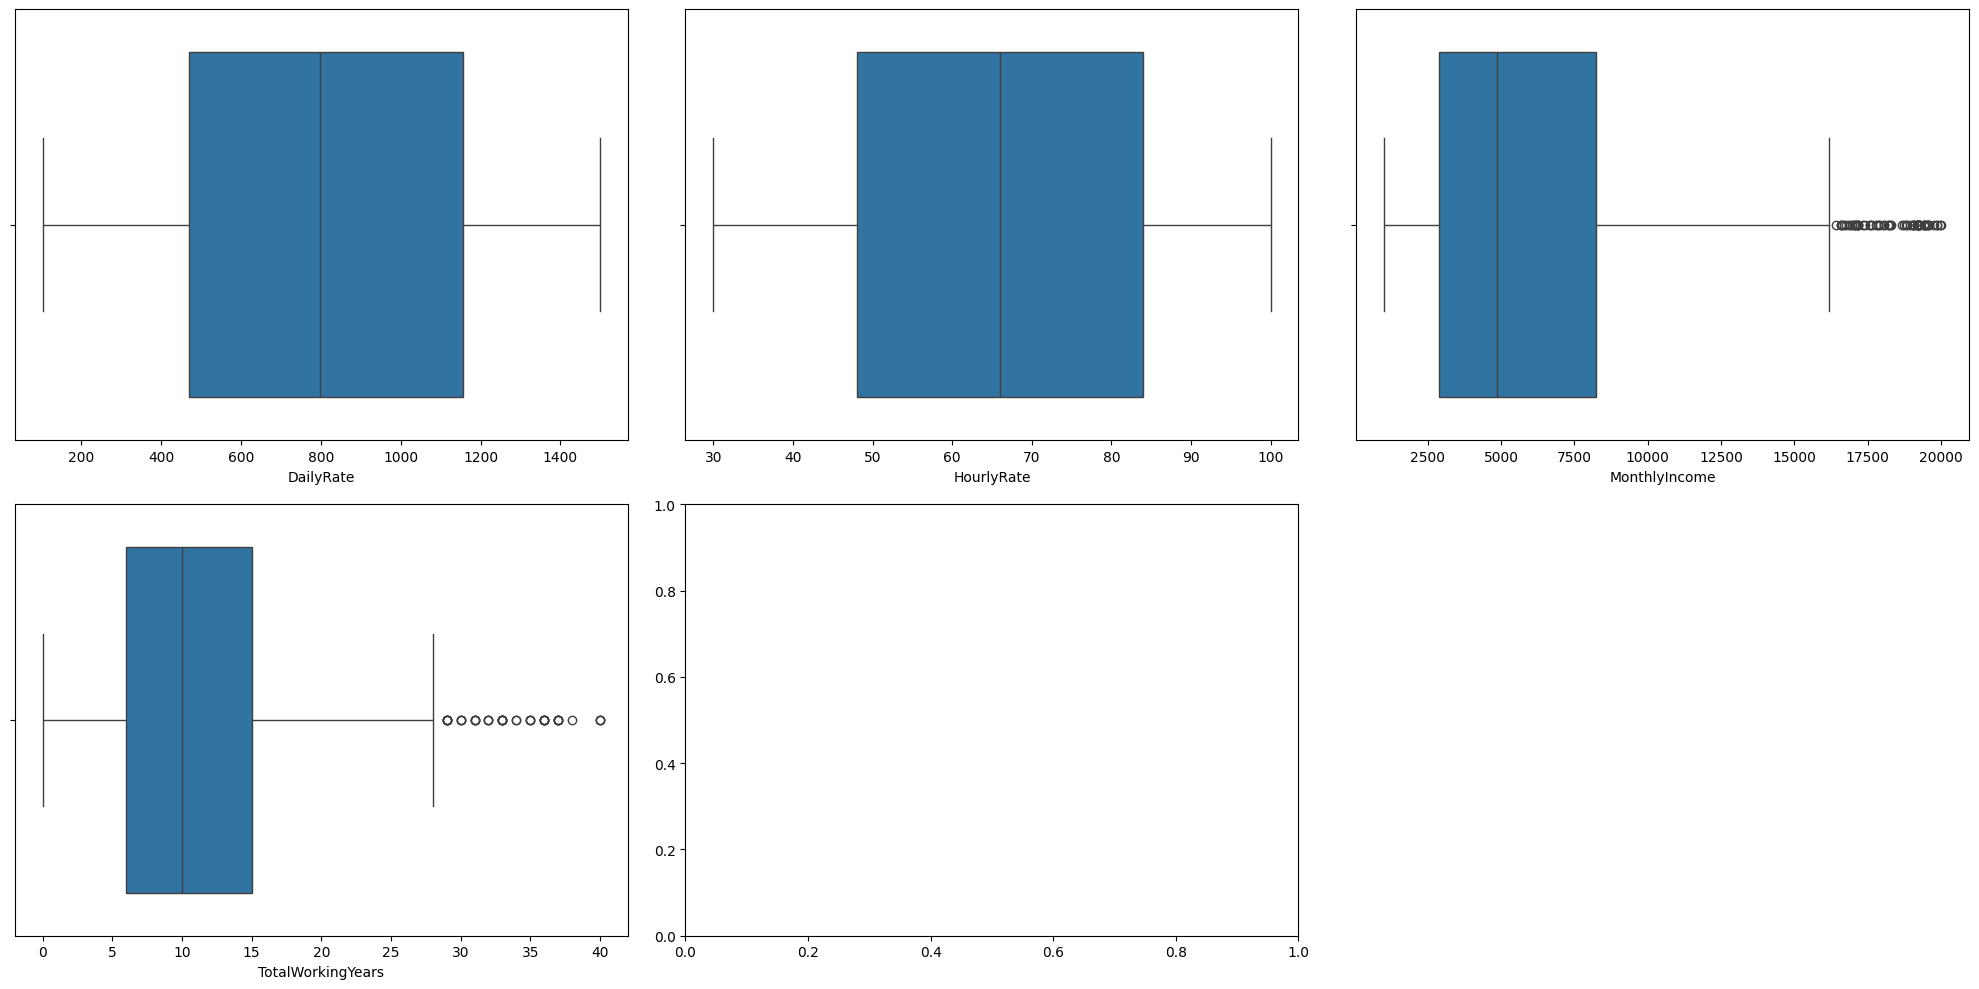

In [15]:
#Main
# Ruta del archivo CSV
archivo = "./data/hr_raw_data_limpio_.csv"

# Cargar los datos desde el archivo CSV
df_datos = cargar_datos(archivo)

# Imputar valores nulos en variables categóricas
df_categoricas = variables_categoricas(df_datos)

# Imputar valores nulos en variables numéricas
df_final = variables_numericas(df_categoricas)
